In [1]:
# 버전확인부터 해 보아요!
import tensorflow as tf
print(tf.__version__)

2.0.0


In [6]:
import tensorflow as tf
import numpy as np

random1 = np.random.rand(2,2)
print(random1)

# Tensorflow

random2 = tf.random.normal([1], dtype = tf.float32)
print(random2) # Tensor가 출력되요!
# TF 1.x버전에서는 node가 가지는 값을 얻어올려면
# (Node를 실행 시키려면 Session이 있어야 했어요!!)

# TF 2.x버전에서는 session 없이 즉시 실행시킬수 있어요 (Eager Execution)
print(random2.numpy())

[[0.05326872 0.02018983]
 [0.47199104 0.86862337]]
tf.Tensor([-0.46128452], shape=(1,), dtype=float32)
[-0.46128452]


In [12]:
import tensorflow as tf

a = tf.constant(10, dtype=tf.float32)
b = tf.constant(20, dtype=tf.float32)

c = a + b

print ('c의 값은 : {}'.format(c.numpy())) 

d = 30.0
# numpy를 tensor로 tensor를 numpy로 변경가능
tensor_d = tf.convert_to_tensor(d)
print((c+ tensor_d).numpy())

c의 값은 : 30.0
60.0


In [26]:
import tensorflow as tf
W = tf.Variable(tf.random.normal([1]), name='weight')

# 기존에는 tf.Variable()을 이용해서 변수를 만들면 사용하기 전에
# 반드시 초기화를 진행해야 했어요!
# sess.run(tf.global_variables_initializer())
# Tf 2.0에서는 초기화를 안해도 되요!!
print(W.numpy())

[-0.47497696]


In [ ]:
# tensorflow graph에 입력을 주는 부분이 없어졌어요!
# 기존에는 graph에게 데이터를 밀어넣기 위해서 placeholder를 이용했어요!
# Eager Execution에 의해서 이제는 placeholder가 필요 없게 됬어요!
# placeholder는 삭제되었습니다. 

# Lazy execution을 하지 않아요! 이젠 Eager Execution을 수행해요!
# TF 

In [142]:
# tensorflow의 keras를 이용하여 Model을 생성해 보아요!
import tensorflow as tf
from tensorflow.keras.models import Sequential
# model = Sequential # keras model 생성 큰 박스 생성
model = tf.keras.models.Sequential()  # keras model 생성 큰 박스 생성
# model을 만들었으니 그 다음에는 layer를 만들어야해요!
model.add(tf.keras.layers.Flatten(input_shape=(2, ))) # 독립변수의 개수
model.add(tf.keras.layers.Dense(3, activation = 'softmax')) # output이 몇개인지 logistic이 몇개인지

# model compile 과정
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

def my_loss():
    pass
          
    
# model 학습
model.fit(x_data_train, t_data_train, epochs=100, batch_size=100, validation_split=0.3)


ValueError: Error when checking input: expected flatten_50_input to have shape (2,) but got array with shape (784,)

In [ ]:
# 우리 KNN의 사용법에 대해서 알아보아요!!
# sklearn을 이용해서 알아보아요!!

# BMI 예제를 이용해서 학습한 후 정확도를 측정해 보아요!
# 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Raw Data Loading
df = pd.read_csv('./data/bmi.csv', skiprows=3)

# data split
x_data_train, x_data_test, t_data_train, t_data_test =\
train_test_split(df[['height', 'weight']],df['label'],test_size=0.3, random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# Logistic Regression
model = LogisticRegression()
model.fit(x_data_train_norm, t_data_train) # 학습
print(model.score(x_data_test_norm, t_data_test)) # 정확도 확인


# KNN을 이용한 분류
knn_model = KNeighborsClassifier(n_neighbors=3) # 이웃 3개 찾으라는 얘기
knn_model.fit(x_data_train_norm, t_data_train)
print(knn_model.score(x_data_test_norm, t_data_test)) # 정확도 확인




In [57]:
# tensorflow 2를 이용해서 Ozone 예제를 다시 구현해 보아요!
# Multiple Linear Regression

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

import warnings
warnings.filterwarnings(action='ignore') # warning 출력을 하지 않아요


# Raw data loading
df = pd.read_csv('./data/ozone.csv')
display(df)

# 결측치 확인 및 처리
# 일단 데이터가 충분히 많고 결측치가 적으면 삭제가 답이에요
# 하지만 일반적으로 결측치를 삭제하면 데이터가 너무 많이 유실되기 때문에 다른 방식을 이용하게 되요!

# print(df.isnull().sum())

# Day, Month 제거
df = df.drop(['Month','Day'],axis=1)

# 결측치를 median으로 변경 
df['Solar.R'][df['Solar.R'].isnull()] = df['Solar.R'].median()
display(df)

# 결측치 median 처리
# x_data = df.loc[:,'Solar.R':]
# x_data = df.iloc[:,1:]
# for col in x_data.columns:
#     col_median = np.nanmedian(x_data[col])
#     x_data[col].loc[x_data[col].isnull()] = col_median


# 2. 독립변수에 대한 이상치를 검출한 후 이 이상치는 mean 처리할게요

# zscore = 1.8
# for col in x_data.columns:
#     outliers = x_data[col][np.abs(stats.zscore(x_data[col])) > zscore]
#     col_mean = np.mean(x_data.loc[~x_data[col].isin(outliers),col])
#     x_data.loc[x_data[col].isin(outliers),col] = col_mean




# 온전한데이터로 KNN 사용 Train 데이터 분류
nan_df = df[df['Ozone'].isnull()]
train_df = df[~df['Ozone'].isnull()]

# display(train_df)
x_data_train = train_df[['Solar.R', 'Wind','Temp']]
t_data_train = train_df['Ozone']

t_data_train= t_data_train.values.reshape(-1,1)

# Normalization
scaler_x = MinMaxScaler()
scaler_x.fit(x_data_train)
x_data_train_norm = scaler_x.transform(x_data_train)

scaler_t = MinMaxScaler()
scaler_t.fit(t_data_train)
t_data_train_norm = scaler_t.transform(t_data_train)


# # Logistic Regression

# sklearn_model = linear_model.LinearRegression()
# sklearn_model.fit(x_data_train_norm, t_data_train_norm) # 학습
# sklearn_model.predict

# # KNN을 이용한 분류
knn_model = KNeighborsRegressor(n_neighbors=3) # 이웃 3개 찾으라는 얘기
knn_model.fit(x_data_train_norm, t_data_train_norm)
nan_df['Ozone'] = scaler_t.inverse_transform(knn_model.predict(nan_df[['Solar.R', 'Wind','Temp']]))

# KNN으로 예측된 데이터를 다시삽입
# nan_df['Ozone'] = model.predict(nan_df[['Solar.R', 'Wind','Temp']])
df = pd.concat([nan_df, train_df], axis = 0, sort =True)
display(df)

from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# 예측값 확인
test_data = [[310, 15, 80]]  # 테이스 데이터 !! Ozone량을 예측해 보아요
x_data = df[['Solar.R', 'Wind','Temp']]
t_data = df['Ozone']
sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(x_data, t_data) # 학습
print(sklearn_model.predict(test_data))



# tensorflow 2.x
# 모델생성
keras_model = Sequential()
# 레이어 추가
keras_model.add(Flatten(input_shape=(3,))) # input layer
# 코드상에 W와 b가 포함되어 있음 10월 12일 그림참조!
keras_model.add(Dense(1, activation = 'linear'))  # output의 개수 // output layer

# compile
keras_model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

# 학습
keras_model.fit(x_data, t_data, epochs = 500, verbose = 1) # 정규화이후 확인

# prediction
print(keras_model.predict(test_data).reshape(-1,1))

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,205.0,14.3,56
...,...,...,...,...
148,30.0,193.0,6.9,70
149,NaN,145.0,13.2,77
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


,Ozone,Solar.R,Temp,Wind
4,50.0,205.0,56,14.3
9,50.0,194.0,69,8.6
24,50.0,66.0,57,16.6
25,30.0,266.0,58,14.9
26,50.0,205.0,57,8.0
...,...,...,...,...
147,14.0,20.0,63,16.6
148,30.0,193.0,70,6.9
150,14.0,191.0,75,14.3
151,18.0,131.0,76,8.0


[39.34104077]
Train on 153 samples
Epoch 1/500
153/153 [==============================] - 0s 1ms/sample - loss: 4525681804919802096965910528.0000
Epoch 2/500
153/153 [==============================] - 0s 37us/sample - loss: inf                              
Epoch 3/500
153/153 [==============================] - 0s 46us/sample - loss: nan
Epoch 4/500
153/153 [==============================] - 0s 46us/sample - loss: nan
Epoch 5/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 6/500
153/153 [==============================] - 0s 43us/sample - loss: nan
Epoch 7/500
153/153 [==============================] - 0s 39us/sample - loss: nan
Epoch 8/500
153/153 [==============================] - 0s 61us/sample - loss: nan
Epoch 9/500
153/153 [==============================] - 0s 49us/sample - loss: nan
Epoch 10/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 11/500
153/153 [==============================] - 0s 42us/sample - loss: nan
Ep

153/153 [==============================] - 0s 40us/sample - loss: nan
Epoch 194/500
153/153 [==============================] - 0s 39us/sample - loss: nan
Epoch 195/500
153/153 [==============================] - 0s 43us/sample - loss: nan
Epoch 196/500
153/153 [==============================] - 0s 55us/sample - loss: nan
Epoch 197/500
153/153 [==============================] - 0s 48us/sample - loss: nan
Epoch 198/500
153/153 [==============================] - 0s 46us/sample - loss: nan
Epoch 199/500
153/153 [==============================] - 0s 52us/sample - loss: nan
Epoch 200/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 201/500
153/153 [==============================] - 0s 48us/sample - loss: nan
Epoch 202/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 203/500
153/153 [==============================] - 0s 42us/sample - loss: nan
Epoch 204/500
153/153 [==============================] - 0s 46us/sample - loss: nan
Epoch 

153/153 [==============================] - 0s 49us/sample - loss: nan
Epoch 388/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 389/500
153/153 [==============================] - 0s 40us/sample - loss: nan
Epoch 390/500
153/153 [==============================] - 0s 49us/sample - loss: nan
Epoch 391/500
153/153 [==============================] - 0s 49us/sample - loss: nan
Epoch 392/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 393/500
153/153 [==============================] - 0s 44us/sample - loss: nan
Epoch 394/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 395/500
153/153 [==============================] - 0s 46us/sample - loss: nan
Epoch 396/500
153/153 [==============================] - 0s 43us/sample - loss: nan
Epoch 397/500
153/153 [==============================] - 0s 45us/sample - loss: nan
Epoch 398/500
153/153 [==============================] - 0s 37us/sample - loss: nan
Epoch 

In [127]:
# Logistic Regression에 대해서 sklearn과 Tensorflow 2.x구현을 해볼꺼에요
# titanic(kaggle) => logistic문제 (결측치가 다수 있어요!)
# feature engineering

# 데이터를 완전히 준비합시다 
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
df = pd.read_csv('./data/Titanic/train.csv')
# display(df)

df['Family'] = df['SibSp']|df['Parch']

df['Sex'] = np.array(df['Sex'] == 'female', dtype = np.int32) 
df['Embarked'] = df['Embarked'].fillna('Q') # fillna 원하는 값으로 채움
embarked_mapping = {'S' : 0 , 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df['Age'] = df['Age'].fillna(df['Age'].median())


df.loc[df['Age'] < 8, 'Age'] = 0
df.loc[(df['Age'] >= 8) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 65), 'Age'] = 2
df.loc[df['Age'] >= 65, 'Age'] = 4
df = df.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Fare','Parch'], axis=1)

display(df)

print(df.isnull().sum())


x_data_train, x_data_test, t_data_train, t_data_test =\
train_test_split(df.iloc[:,1:],df['Survived'],test_size=0.3, random_state=0)

scaler_x = MinMaxScaler()
scaler_x.fit(x_data_train)
x_data_train_norm = scaler_x.transform(x_data_train)
x_data_test_norm = scaler_x.transform(x_data_test)

sklearn_model = LogisticRegression()
sklearn_model.fit(x_data_train_norm,t_data_train)
sklearn_result = sklearn_model.score(x_data_test_norm,t_data_test)
print('sklearn의 정확도는 : {}'.format(sklearn_result))


# tensorflow 2.x로 구현
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(x_data_test_norm.shape[1],))) # column의 수
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy',
                   metrics=['accuracy'])

t_data_train = np.array(t_data_train)
t_data_test = np.array(t_data_test)

result = keras_model.fit(x_data_train_norm, t_data_train, 
                         epochs = 1000, verbose = 0, validation_split=0.3)

keras_result = keras_model.evaluate(x_data_test_norm,t_data_test)

print(keras_result)

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,2.0,0,1
1,1,1,1,2.0,1,1
2,1,3,1,2.0,0,0
3,1,1,1,2.0,0,1
4,0,3,0,2.0,0,0
...,...,...,...,...,...,...
886,0,2,0,2.0,0,0
887,1,1,1,1.0,0,0
888,0,3,1,2.0,0,3
889,1,1,0,2.0,1,0


Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
Family      0
dtype: int64
sklearn의 정확도는 : 0.7910447761194029
268/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5449802270576135, 0.76119405]


<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


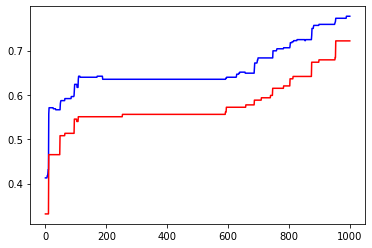

In [128]:
import matplotlib.pyplot as plt
print(type(result))
print(result.history.keys())
plt.plot(result.history['accuracy'], color='b')
plt.plot(result.history['val_accuracy'], color='r')
plt.show()

In [2]:
# Multinomial Classification에 대해서 sklearn과 TF 2.x의 구현을 해보아요!
# MNIST예제를 이용해서 구현해 보아요!

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Raw Data Loading
df = pd.read_csv('/Users/admin/Downloads/Digit_Recognizer_train.csv')
display(df)

# 결측치나 이상치는 없어요!!
# Feature Engineering 할 필요가 없어요!

# 독립변수와 종속변수 분리
x_data = df.iloc[:,1:]
t_data = df.iloc[:,0] # one-hot encoding 처리를 해야하는데 일단은 pass

# normalization
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train,x_data_test,t_data_train,t_data_test=\
train_test_split(x_data_norm, t_data, test_size=0.3, random_state=0)

# 데이터 준비가 끝났어요 !! 이제 학습을 진행해 보아요!
sklearn_model = LogisticRegression(solver='saga')
# solver라는 개념이 있는데 default로 사용되는건 lbfgs라는 놈이에요!
# lbfgs : 작은 데이터셋이 좋아요!, 데이터량이 많으면 성능이 별로에요!
# 데이터량이 많은 경우 sag(Stochastic Average Gradient Descent)를 사용하면 더 좋아요!
# 일반적으로 또 이걸 개량한 saga 를 더많이 이용해요!

sklearn_model.fit(x_data_train, t_data_train) # 학습진행
print('sklearn result : ')
print(classification_report(t_data_test, 
                            sklearn_model.predict(x_data_test)))


# TF 2.0 구현 
# keras_model = Sequential()
# keras_model.add(Flatten(input_shape=(x_data_train.shape[1],)))
# keras_model.add(Dense(10, activation ='softmax'))
# keras_model.compile(optimizer=SGD(learning_rate=1e-2),
#                     loss = 'sparse_categorical_crossentropy',
#                     metrics=['sparse_categorical_accuracy'])

# t_data_train = np.array(t_data_train)
# t_data_test = np.array(t_data_test)
# history = keras_model.fit(x_data_train, t_data_train, epochs=500,
#                           batch_size= 100, verbose = 0, validation_split=0.3)
# print(keras_model.evaluate(x_data_test, t_data_test))
# print('tensorflow result :')
# print(classification_report(t_data_test, keras_model.predict(x_data_test)))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


sklearn result : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1242
           1       0.95      0.97      0.96      1429
           2       0.92      0.90      0.91      1276
           3       0.91      0.90      0.90      1298
           4       0.92      0.92      0.92      1236
           5       0.88      0.88      0.88      1119
           6       0.93      0.95      0.94      1243
           7       0.94      0.93      0.94      1334
           8       0.89      0.88      0.88      1204
           9       0.89      0.89      0.89      1219

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



/Users/admin/opt/anaconda3/envs/data_env_tensorflow2/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [4]:
# print(classification_report(t_data_test, keras_model.predict(x_data_test)))
print(classification_report(t_data_test, 
                            (tf.argmax(keras_model.predict(x_data_test), axis=1)).numpy()))

import matplotlib.pyplot as plt
history.history.keys()
plt.plot(history.history['sparse_categorical_accuracy'], color='b')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='r')
plt.show()


NameError: name 'keras_model' is not defined